In [1]:
import talib
import finlab_crypto
finlab_crypto.setup()
ohlcv_4h = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')


All caught up..!


  0%|          | 0/256 [00:00<?, ?it/s]

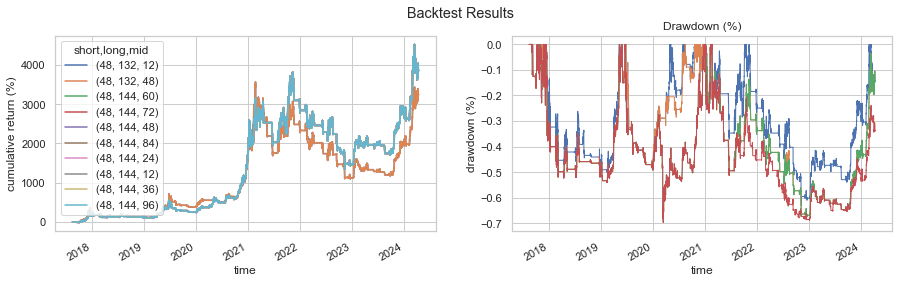

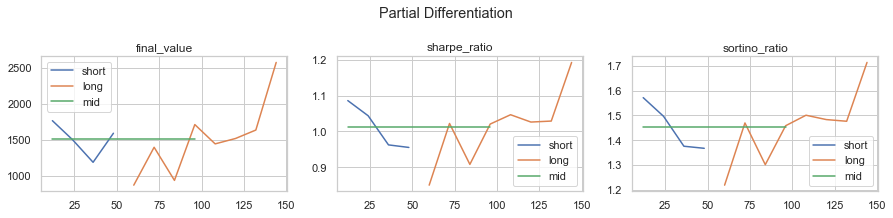

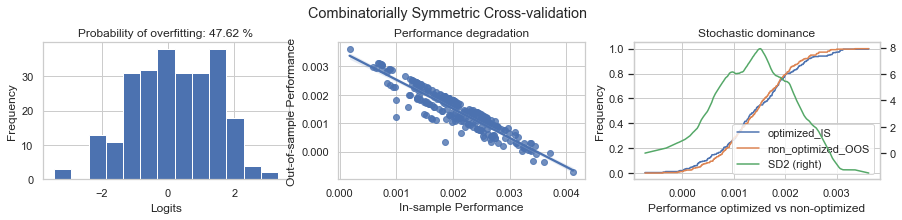

Output()

In [7]:
from finlab_crypto import Strategy
import numpy as np


close=ohlcv_4h.close
talib.MA(close)
def crossover(close,short,long):
    short=talib.MA(close,timeperiod=short)
    long=talib.MA(close,timeperiod=long)
    entries=(short>long)&(short.shift()<long)
    return entries

def crossdown(close,short,long):
    short=talib.MA(close,timeperiod=short)
    long=talib.MA(close,timeperiod=long)
    exits=(short<long)&(short.shift()>long)
    return exits

@Strategy(short=12,long=48,mid=24)
def trend_strategy(ohlcv_4h):

    close = ohlcv_4h.close

    # atr=talib.ATR(ohlcv_4h.high,ohlcv_4h.low,close)
    # stop=close-atr*2
    # stop.loc[stop.shift()>close]
    entries=crossover(close,trend_strategy.short,trend_strategy.long,)
    exits=crossdown(close,trend_strategy.short,trend_strategy.long,)
    return entries, exits


var={
    'short':np.arange(12,60,12),
    'long':np.arange(60,145,12),
    'mid':np.arange(12,97,12)
}
portfolio = trend_strategy.backtest(ohlcv_4h, variables=var,freq='4h', plot=True)

In [5]:
var={
    'short':48,
    'long':144,
}
portfolio = trend_strategy.backtest(ohlcv_4h, variables=var,freq='4h', plot=True)

In [4]:
atr=talib.ATR(ohlcv_4h.high,ohlcv_4h.low,close)
stop=close-(atr*2)
# stop = stop.where(stop.shift() > close) 

In [70]:
stop.where(stop.shift() >close) 

timestamp
2017-08-17 04:00:00+00:00   NaN
2017-08-17 08:00:00+00:00   NaN
2017-08-17 12:00:00+00:00   NaN
2017-08-17 16:00:00+00:00   NaN
2017-08-17 20:00:00+00:00   NaN
                             ..
2024-04-09 16:00:00+00:00   NaN
2024-04-09 20:00:00+00:00   NaN
2024-04-10 00:00:00+00:00   NaN
2024-04-10 04:00:00+00:00   NaN
2024-04-10 08:00:00+00:00   NaN
Length: 14554, dtype: float64